In [1]:
import pandas as pd
dir_train=r'C:\Users\guito\PycharmProjects\Trabajo_redes_sociales\train.csv'
df_train = pd.read_csv(dir_train)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
df_train.describe()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,...,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,6.498840e+05,1.265895e+04,5952.453273,2.666032e+03,1032.371839,6.011873,1.109924,9.090730,5267.768000,...,12738.259818,5903.148364,2.554598e+03,997.149954,6.099658,1.106236,9.505821,5254.933636,85.024196,3745.175480
std,0.499956,2.028787e+06,4.900867e+04,17339.141191,2.916543e+04,10954.953223,9.519797,1.910104,18.311060,28946.777345,...,50054.520874,16298.462018,2.508873e+04,9342.006880,9.729557,1.939914,19.424680,26778.820125,106.689384,5518.399590
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,...,0.000000,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000
25%,0.000000,2.663750e+03,3.220000e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.632440,12.000000,...,322.000000,75.000000,3.260473e+00,0.714556,0.356943,0.100503,0.822584,11.000000,15.176568,1206.500000
50%,1.000000,4.558900e+04,7.780000e+02,932.000000,4.876542e+01,14.029113,2.299666,0.341936,3.555194,195.000000,...,773.000000,890.000000,4.876542e+01,14.029113,2.251398,0.341936,3.342999,190.000000,54.925234,2206.420734
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.198330,1.320681,10.691878,1323.000000,...,2838.000000,6734.000000,3.743699e+02,107.081021,6.866840,1.320681,10.600502,1323.000000,112.191489,4349.908608
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,...,664324.000000,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1861.583333,75526.083333


In [4]:
df_train.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

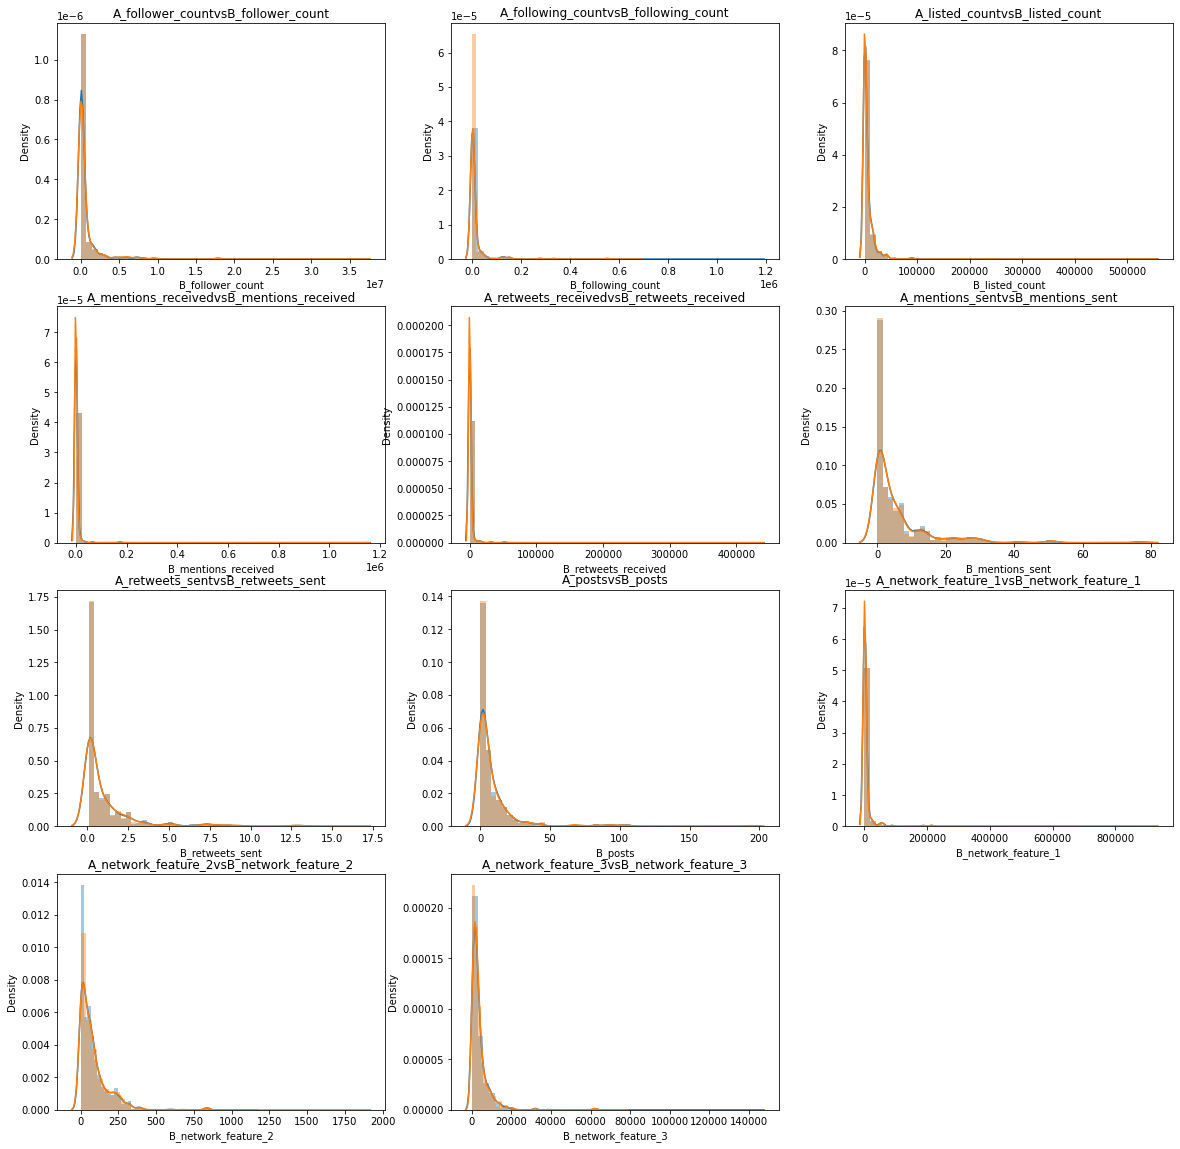

In [5]:
fig = plt.figure(figsize=(20,20))
for i in range(11):
    ax=plt.subplot(4,3,i+1) 
    sns.distplot(df_train[df_train.columns.values[i+1]]).set_title(df_train.columns.values[i+1]+'vs'+df_train.columns.values[i+12])
    sns.distplot(df_train[df_train.columns.values[i+12]])
    


In [6]:
df_train_log=df_train.drop('Choice',1).apply(lambda x: np.log(x+1))
df_train_log['Choice']=df_train['Choice']

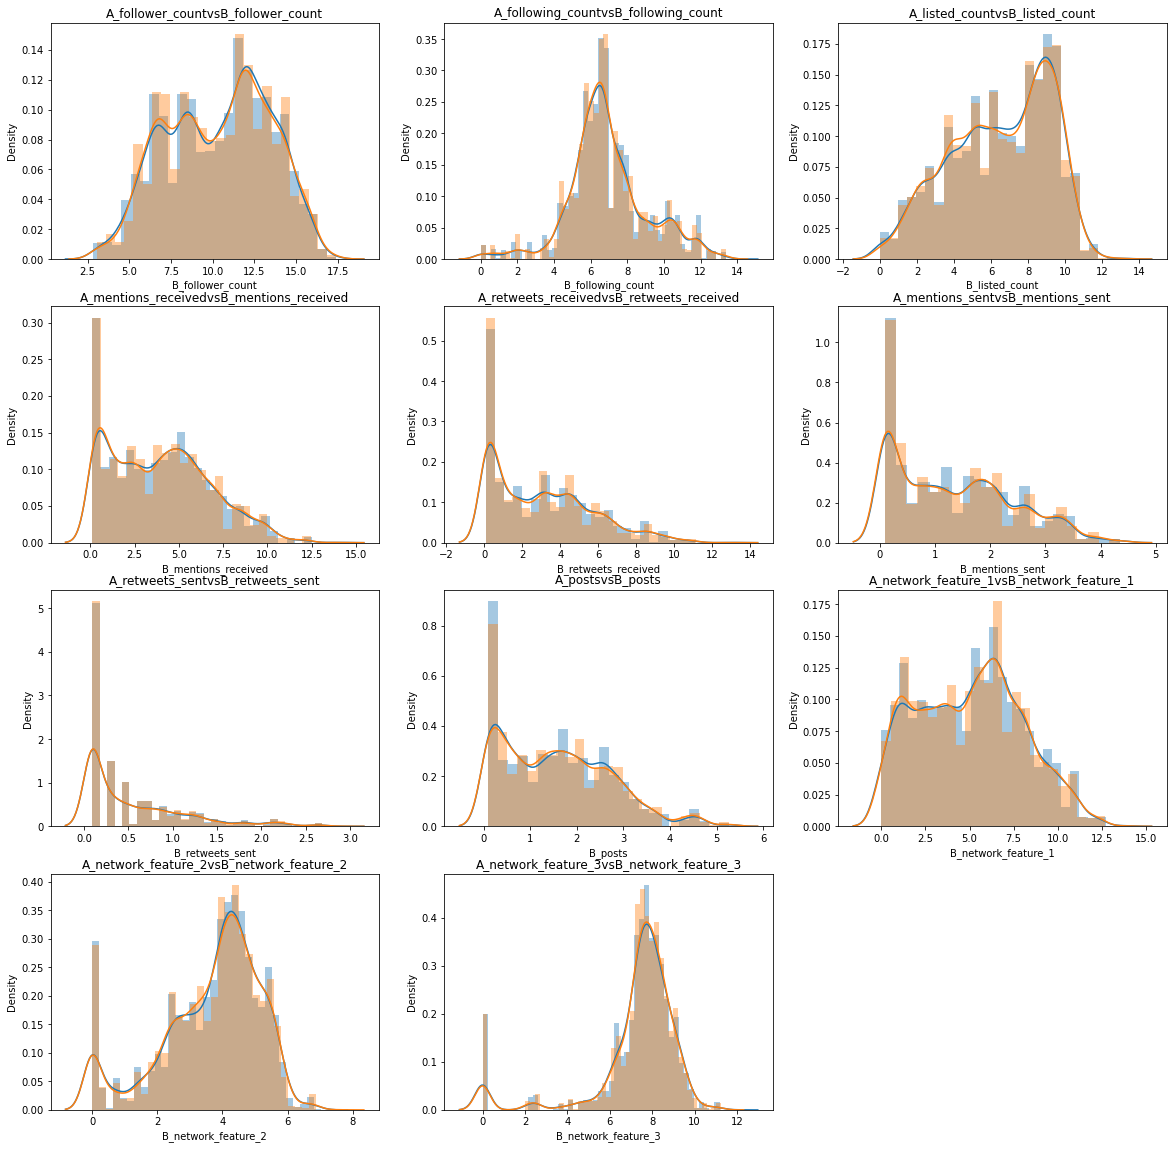

In [7]:
fig = plt.figure(figsize=(20,20))
for i in range(11):
    ax=plt.subplot(4,3,i+1) 
    sns.distplot(df_train_log[df_train.columns.values[i+1]]).set_title(df_train.columns.values[i+1]+'vs'+df_train.columns.values[i+12])
    sns.distplot(df_train_log[df_train.columns.values[i+12]])
    

In [8]:
scaler = StandardScaler()
scaler.fit(df_train.drop('Choice',1))
df_standard_scaler=scaler.transform(df_train.drop('Choice',1))
df_standard_scaler=pd.DataFrame(df_standard_scaler)
df_standard_scaler['Choice']=df_train['Choice']
df_standard_scaler

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,Choice
0,-0.320248,-0.252161,-0.343154,-0.091399,-0.094237,-0.621012,-0.528512,-0.476727,-0.181929,0.785046,...,-0.258585,-0.101217,-0.106322,0.216337,-0.398927,-0.129590,-0.193788,-0.088994,-0.331337,0
1,-0.309717,-0.234265,-0.330176,-0.088317,-0.091891,-0.031783,0.000646,-0.213776,-0.169249,-0.637708,...,-0.263432,-0.100218,-0.105791,-0.295208,-0.279364,-0.434307,-0.190165,0.440632,-0.147458,0
2,-0.316757,-0.233530,-0.337501,-0.090544,-0.093374,-0.068322,-0.271590,-0.300447,-0.178716,-0.152574,...,-0.349583,-0.101802,-0.106710,-0.564975,-0.518489,-0.458356,-0.196140,-0.700141,-0.628472,0
3,-0.320350,-0.258181,-0.343212,-0.091155,-0.094221,-0.491690,-0.528512,-0.341907,-0.181790,-0.795716,...,-0.345165,-0.078996,-0.064966,2.205068,3.124814,1.163373,-0.130448,-0.577007,-0.425765,0
4,-0.297887,-0.240733,-0.190999,-0.086315,-0.090869,2.297516,1.164214,0.806720,-0.162961,0.409356,...,-0.351117,-0.100971,-0.106365,0.068355,0.006955,-0.254471,-0.193078,-0.342373,-0.317430,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,-0.299772,-0.254549,-0.265115,-0.038967,-0.068424,7.437562,2.242096,5.207594,-0.067743,-0.333192,...,0.566967,0.172479,0.429978,1.704598,0.659523,0.459002,0.698491,-0.597107,-0.422507,0
5496,-0.320305,-0.253365,-0.343039,-0.091369,-0.094237,-0.621012,-0.528512,-0.463563,-0.181825,0.113342,...,-0.361733,-0.101820,-0.106715,-0.616647,-0.518489,-0.405904,-0.196215,-0.337686,0.221792,1
5497,-0.312776,-0.244590,-0.300241,-0.089499,-0.092209,0.098158,-0.402103,-0.141280,-0.175019,0.650466,...,-0.351117,-0.100971,-0.106365,0.068355,0.006955,-0.254471,-0.193078,-0.342373,-0.317430,0
5498,-0.189601,-0.254059,-0.311546,-0.069750,-0.052467,-0.057873,-0.528512,-0.086983,-0.092066,-0.778166,...,1.001956,-0.094795,-0.102216,0.077047,0.123128,-0.264942,-0.170259,1.399647,0.620397,0


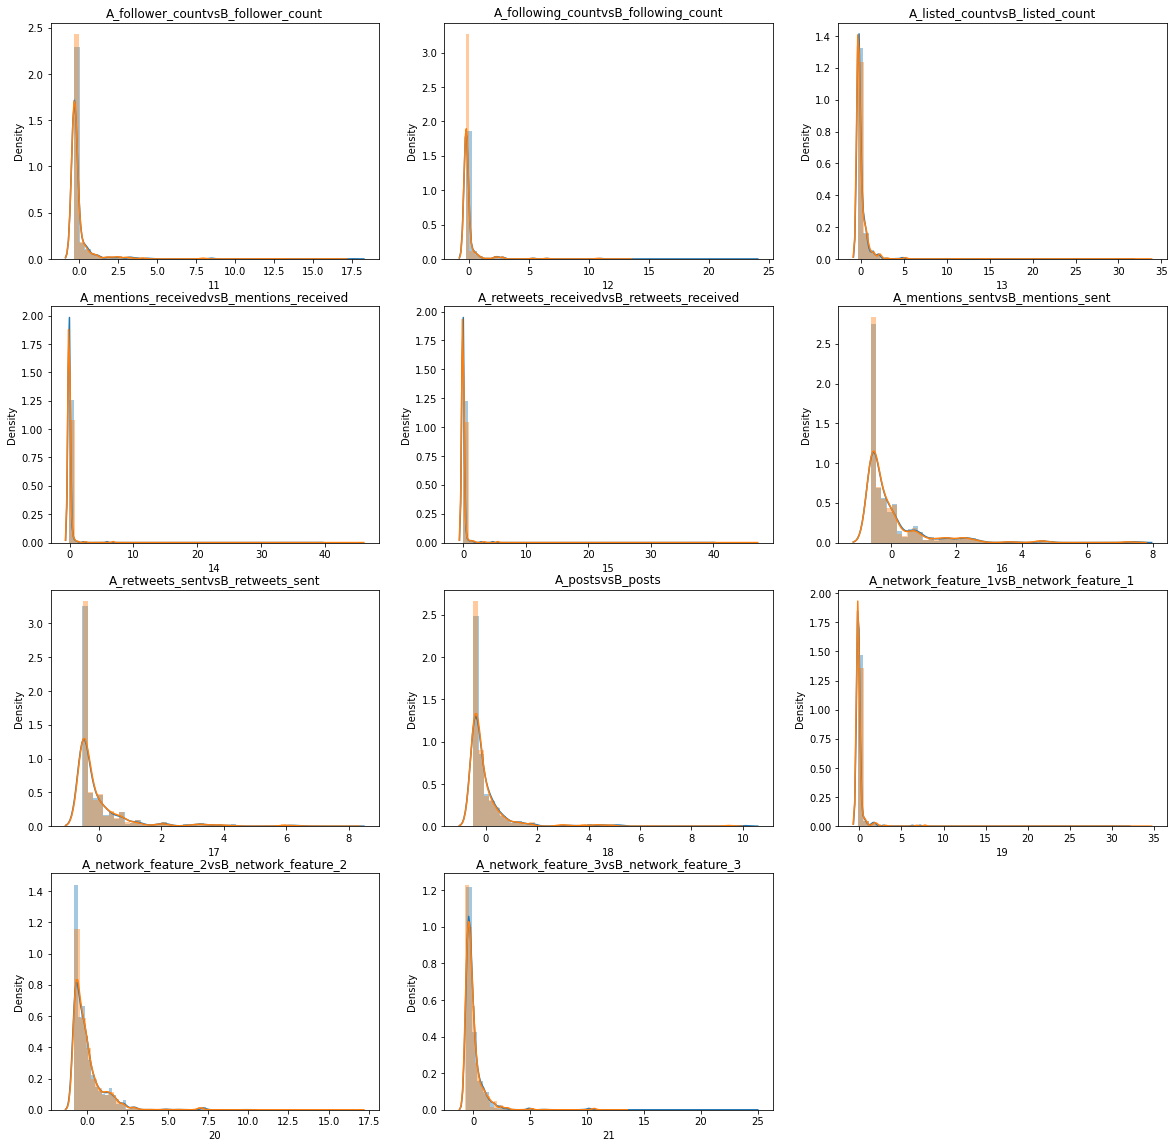

In [9]:
fig = plt.figure(figsize=(20,20))
for i in range(11):
    ax=plt.subplot(4,3,i+1) 
    sns.distplot(df_standard_scaler[df_standard_scaler.columns.values[i]]).set_title(df_train.columns.values[i+1]+'vs'+df_train.columns.values[i+12])
    sns.distplot(df_standard_scaler[df_standard_scaler.columns.values[i+11]])
    

In [10]:
df_train_3=df_train.drop('Choice',1).apply(lambda x: 1/(x+1))
df_train_3['Choice']=df_train['Choice']

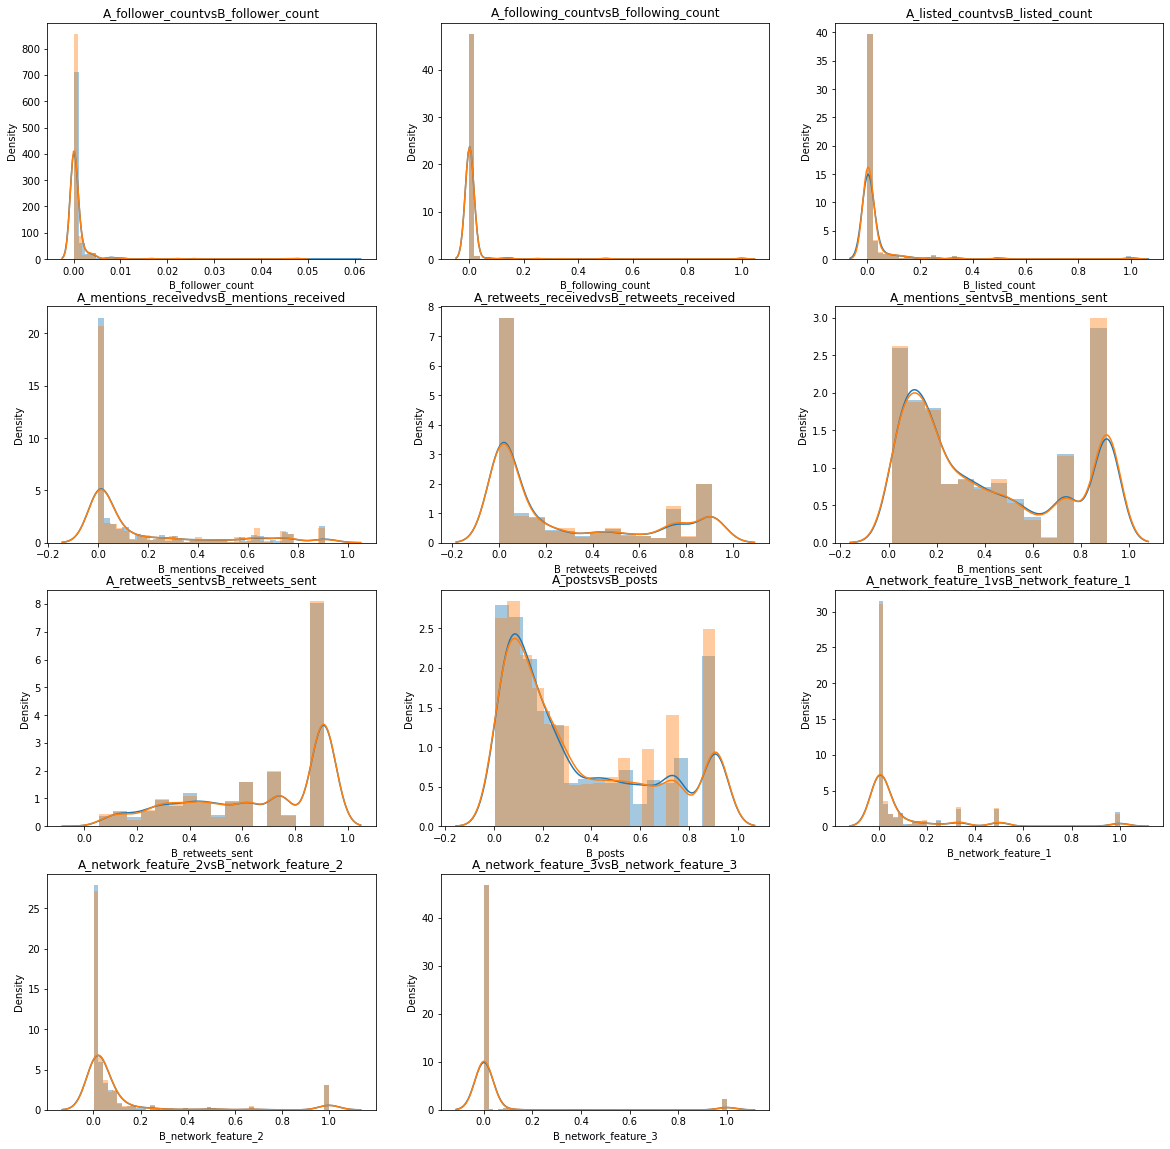

In [11]:
fig = plt.figure(figsize=(20,20))
for i in range(11):
    ax=plt.subplot(4,3,i+1) 
    sns.distplot(df_train_3[df_train_3.columns.values[i]])
    sns.distplot(df_train_3[df_train_3.columns.values[i+11]]).set_title(df_train.columns.values[i+1]+'vs'+df_train.columns.values[i+12])
    